In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from atlas_topq_2019_23_Limits import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 20)

In [2]:
recastData = pd.read_pickle('./pp2tt_formFactors_scan.pcl')
recastDataEFT = pd.read_pickle('./pp2tt_eft_scan.pcl')

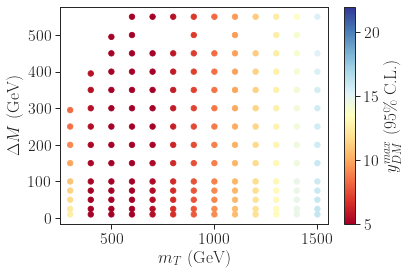

In [3]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

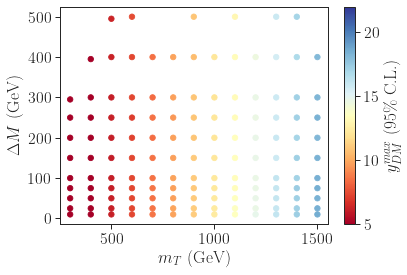

In [4]:
x = recastDataEFT['mST']
y = recastDataEFT['mChi']
dm = x-y
z = recastDataEFT['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

In [5]:
red = recastData[(recastData['mST'] == 500.) & (recastData['mChi'] == 400.)]
red.T

,28
model,Top-FormFactorsOneLoop-UFO
mST,500.0
mChi,400.0
mT,172.5
yDM,1.0
...,...
bin_720_836_Error,0.000001
bin_836_2000,0.000002
bin_836_2000_Error,0.0
yDM (95% C.L.),4.027946


In [6]:
redEFT = recastDataEFT[(recastDataEFT['mST'] == 500.) & (recastDataEFT['mChi'] == 400.)]
redEFT.T

,25
model,Top-EFTphysical_simple-UFO
mST,500.0
mChi,400.0
mT,172.5
yDM,1.0
...,...
bin_720_836_Error,0.000001
bin_836_2000,0.000037
bin_836_2000_Error,0.0
yDM (95% C.L.),6.072865


In [7]:
# ### Load CMS data
xsecsObs,sm,covMatrix = read_ATLASdata()
# ### Load LO background from MG5
smLO = getSMLO()
# Get k-factor for each bin
kfac = getKfactor(sm,smLO)

In [30]:
binCols = [c for c in red.columns 
               if 'bin_' in c.lower() and not 'error' in c.lower()]
bins_left = np.array([eval(c.split('_')[1]) for c in binCols])
bins_right = np.array([eval(c.split('_')[2]) for c in binCols])               

In [31]:
signal = list(zip(bins_left,red.iloc[0][binCols].values))
signal = np.array(sorted(signal))[:,1]

signalEFT = list(zip(bins_left,redEFT.iloc[0][binCols].values))
signalEFT = np.array(sorted(signalEFT))[:,1]


In [10]:
signal = kfac*signal
signalEFT = kfac*signalEFT

In [23]:
signal = signal/bin_widths
signalEFT = signalEFT/bin_widths
sm_bin = sm/bin_widths

In [24]:
resDict = getUL(signal,sm_bin,xsecsObs,covMatrix,deltas=0.0)
print(resDict)
resDictEFT = getUL(signalEFT,sm_bin,xsecsObs,covMatrix,deltas=0.0)
print(resDictEFT)

{'yDMmin': array([0.]), 'chi2min': 10.139227277087516, 'yDM95': 4.577957570281909, 'deltaChi95': 3.839999999999998}
{'yDMmin': array([0.]), 'chi2min': 10.139227277087516, 'yDM95': 5.704564241274893, 'deltaChi95': 3.8400000000000016}


In [25]:
yDMvals = np.linspace(0.,10.,200)
deltas = 0.0
c2 = np.array([chi2(y, signal, sm_bin, xsecsObs, covMatrix, deltas) for y in yDMvals])
c2EFT = np.array([chi2(y, signalEFT, sm_bin, xsecsObs, covMatrix, deltas) for y in yDMvals])

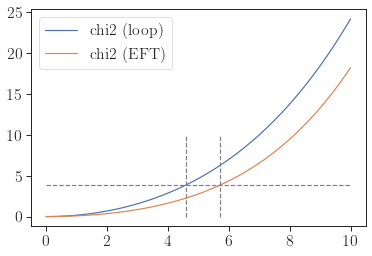

In [27]:
plt.plot(yDMvals,c2-resDict['chi2min'],label='chi2 (loop)')
plt.plot(yDMvals,c2EFT-resDict['chi2min'],label='chi2 (EFT)')
plt.hlines(y=3.84,xmin=yDMvals.min(),xmax=yDMvals.max(),linestyles='dashed',colors='gray')
plt.vlines(x=resDict['yDM95'],ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.vlines(x=resDictEFT['yDM95'],ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.legend()
# plt.ylim(0,100)
plt.show()

In [32]:
signal/signalEFT

array([-7.53851470e+00, -2.87896935e+02,  9.50381051e+00,  4.31246684e+00,
        2.51070047e+00,  1.48390136e+00,  8.11684242e-01,  5.58959650e-02])

In [29]:
atlas_bins

array([ 355.,  381.,  420.,  478.,  549.,  633.,  720.,  836., 2000.])